<a href="https://colab.research.google.com/github/TheHstler/Machine-Learning-Assingment-2/blob/main/WeatherML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data and Datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Clustering models
from sklearn.cluster import dbscan

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time

# For visualising decision trees
from sklearn.tree import plot_tree
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

# Loading the dataset

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Two datasets/diabetes_dataset_100k.csv')
dataset = pd.read_csv('drive/MyDrive/Two datasets/weather_dataset.csv')

# Use pandas to load the datasets
df1 = pd.read_csv('drive/MyDrive/Two datasets/diabetes_dataset_100k.csv')
df2 = pd.read_csv('drive/MyDrive/Two datasets/weather_dataset.csv')

In [ ]:
# Display the first few rows of each dataset
print(df1.info())
print()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34144 entries, 0 to 34143
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 33838 non-null  float64
 1   gender               33844 non-null  object 
 2   age                  33839 non-null  float64
 3   location             33841 non-null  object 
 4   race                 33837 non-null  float64
 5   hypertension         33835 non-null  float64
 6   heart_disease        33838 non-null  float64
 7   smoking_history      33839 non-null  object 
 8   bmi                  33863 non-null  float64
 9   hbA1c_level          27050 non-null  float64
 10  blood_glucose_level  23657 non-null  float64
 11  diabetes             34143 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.1+ MB
None



,year,gender,age,location,race,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020.0,Female,32.0,Alabama,5.0,0.0,0.0,never,27.32,NaN,100.0,0.0
1,2015.0,Female,29.0,Alabama,2.0,0.0,0.0,never,19.95,NaN,90.0,0.0
2,2015.0,Male,18.0,Alabama,5.0,0.0,0.0,never,23.76,4.8,160.0,0.0
3,2015.0,Male,41.0,Alabama,3.0,0.0,0.0,never,27.32,4.0,NaN,0.0
4,2016.0,Female,52.0,Alabama,1.0,0.0,0.0,never,23.75,6.5,NaN,0.0


In [ ]:
print(df2.info())
print()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           10392 non-null  float64
 1   humidity              12977 non-null  float64
 2   wind_speed            12967 non-null  float64
 3   precipitation         9099 non-null   float64
 4   cloud_cover           12970 non-null  object 
 5   atmospheric_pressure  12961 non-null  float64
 6   season                12962 non-null  object 
 7   visibility            12968 non-null  float64
 8   location              12968 non-null  object 
 9   weather               13200 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.0+ MB
None



,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,season,visibility,location,weather
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,Spring,10.0,inland,Cloudy
2,NaN,0.0,7.0,NaN,clear,1018.72,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,Spring,1.0,coastal,Sunny
4,NaN,74.0,17.0,NaN,overcast,990.67,Winter,2.5,mountain,Rainy


In [ ]:
df1.describe()

,year,age,race,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,33838.000000,33839.000000,33837.000000,33835.000000,33838.000000,33863.000000,27050.000000,23657.000000,34143.000000
mean,2018.389473,41.790633,2.989804,0.073533,0.039098,25.962953,5.522732,137.822505,0.085611
std,1.321707,22.449959,1.419860,0.261014,0.193831,8.792323,1.070397,41.082198,0.279792
min,2015.000000,0.080000,1.000000,0.000000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,2.000000,0.000000,0.000000,22.650000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,3.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,59.000000,4.000000,0.000000,0.000000,29.240000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,5.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [ ]:
df2.describe()

,temperature,humidity,wind_speed,precipitation,atmospheric_pressure,visibility
count,10392.000000,12977.000000,12967.000000,9099.000000,12961.000000,12968.000000
mean,19.148768,65.258457,9.829837,53.639081,1005.882164,5.468924
std,17.367761,24.753316,6.906346,31.961687,37.190289,3.371322
min,-25.000000,0.000000,0.000000,0.000000,800.120000,0.000000
25%,4.000000,54.000000,5.000000,19.000000,994.810000,3.000000
50%,21.000000,69.000000,9.000000,58.000000,1007.690000,5.000000
75%,31.000000,83.000000,13.500000,82.000000,1016.790000,7.500000
max,108.000000,109.000000,48.500000,109.000000,1199.210000,20.000000


# Exploratory Data Analysis For Diabetes

In [ ]:
# TODO'S: Missing Values? Noise/Outliers? Duplicates? Class Imbalance?

In [16]:
# EDA for the diabetes dataset
print("Missing Values in the Diabetes Dataset")
print(df1.isnull().sum())

Missing Values in the Diabetes Dataset
year                     306
gender                   300
age                      305
location                 303
race                     307
hypertension             309
heart_disease            306
smoking_history          305
bmi                      281
hbA1c_level             7094
blood_glucose_level    10487
diabetes                   1
dtype: int64


In [18]:
rows_with_missing = df1.isnull().any(axis=1).sum()
print(f"\nTotal rows with missing values: {rows_with_missing}")


Total rows with missing values: 15264


In [20]:
#This shows how many entries("rows" which are on the right side) have a number of missing values
missing_counts = df1.isnull().sum(axis=1)
print("\nDistribution of missing values per row:")
print(missing_counts.value_counts().sort_index())


Distribution of missing values per row:
0     18880
1     12900
2      2025
6         1
7         5
8        16
9        89
10      124
11      104
Name: count, dtype: int64


<Axes: ylabel='Missing Values'>

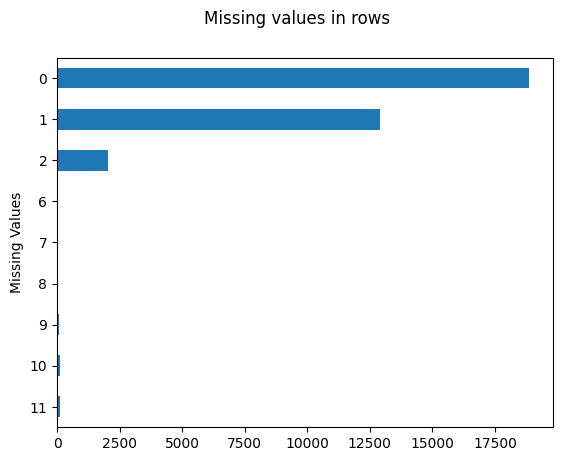

In [25]:
plt.figure()
plt.suptitle('Missing values in rows')
#plt.ylabel('Frequency')
plt.ylabel('Missing Values')
plt.xlabel('Rows')
df1.isnull().sum(axis=1).value_counts().sort_index(ascending=False).plot(kind="barh")

In [26]:
# Count the occurrences of each weather condition
diabetes_counts = df1['diabetes'].value_counts()
print("Class balance for 'diabetes' column:")
print(diabetes_counts)

Class balance for 'diabetes' column:
diabetes
0.0    31220
1.0     2923
Name: count, dtype: int64


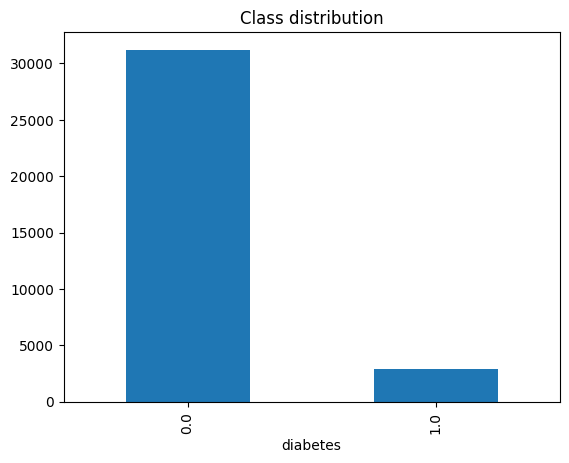

In [27]:
# a bar chart for the 'class' distribution
df1['diabetes'].value_counts().plot(kind='bar', title='Class distribution');

# Exploratory Data Analysis For Weather

In [17]:
# EDA for the diabetes dataset
print("Missing Values in the Diabetes Dataset")
print(df2.isnull().sum())

Missing Values in the Diabetes Dataset
temperature             2808
humidity                 223
wind_speed               233
precipitation           4101
cloud_cover              230
atmospheric_pressure     239
season                   238
visibility               232
location                 232
weather                    0
dtype: int64
